# Brady Hobson, Sara Kent
# DS4420
# Final Project Python - CNN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv1D, Flatten, Dense, Dropout
from keras.optimizers import Adam

/Users/bradyhobson/Documents/School/DS4420/ds4420/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
# load dfs 
dayahead_df = pd.read_csv("dayahead_data.csv")
load_forecast = pd.read_csv("load_forecast_data.csv")
lmp_df = pd.read_csv("lmp_data.csv")

In [3]:
# merge dfs on time
merged_df = dayahead_df.merge(load_forecast, on='interval_start_utc').merge(lmp_df, on='interval_start_utc')
main_df = merged_df[["day_ahead_lmp", "lmp", "load_forecast"]]
X = main_df[["day_ahead_lmp", "load_forecast"]]
bias_col = np.ones((X.shape[0], 1))
X = np.concatenate((bias_col, X), axis=1)
y = main_df["lmp"]

# split data
train_size = int(0.8 * len(X))
X_train = X[:train_size]
X_test = X[train_size:]
y_train = y[:train_size]
y_test = y[train_size:]

In [4]:
# reshape data for CNN
X_train = np.expand_dims(X_train, axis=2) 
X_test = np.expand_dims(X_test, axis=2)

# start model
model = Sequential()

# 1D Convolutional layers
model.add(Conv1D(64, 2, activation='linear', input_shape=(X_train.shape[1], 1)))
# dropout for regularization
model.add(Dropout(0.2))

model.add(Conv1D(128, 2, activation='linear'))
model.add(Dropout(0.2))

model.add(Flatten())


# MLP layers
model.add(Dense(64, activation='linear'))
model.add(Dense(1)) 

# compile model
model.compile(optimizer=Adam(learning_rate=0.005), loss='mean_squared_error')

/Users/bradyhobson/Documents/School/DS4420/ds4420/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# fit model
fitted = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# test the model on test data
test_loss = model.evaluate(X_test, y_test)
print("Test Loss (MSE):", test_loss)

Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1517095.7500 - val_loss: 305.9322
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1509.6100 - val_loss: 209.6028
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1736.7936 - val_loss: 240.0267
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1721.0662 - val_loss: 213.0590
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1806.4043 - val_loss: 199.3074
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1347.4999 - val_loss: 227.1277
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1569.5835 - val_loss: 262.8308
Epoch 8/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 998.2964 - val_loss: 411.5318
Epoch 9/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 957us/step - loss: 1170.5171 - val_loss: 202.5374
Epoch 10/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1109.8901 - val_loss: 345.9688
Epoch 11/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 13

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step


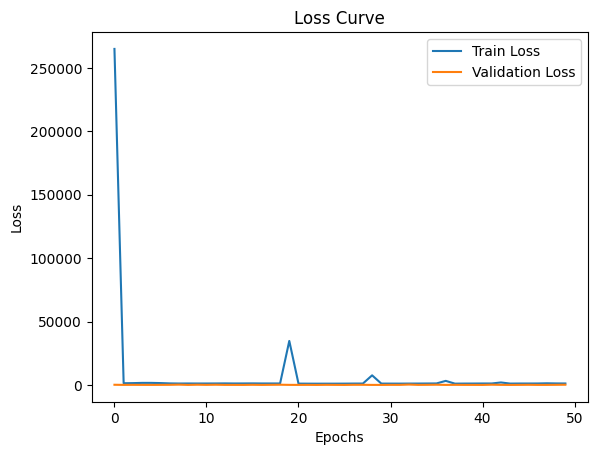

In [ ]:
# predict using test data
y_pred = model.predict(X_test)

plt.plot(fitted.history['loss'], label='Train Loss')
plt.plot(fitted.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')
plt.show()